# Mutual Information Between Independent Dices

In this task, We replicate two dice experiments. We use $d_1,d_2,d_3,d_4,d_5$ to indicate dice number.  
* In the first experiment, we use 2 dices to estimate mutual information $\hat I (d_1;d_2)$  


* In the first experiment, we extend 2 dices to 5 dices and estimate mutual information $\hat I (\{d_1,d_2,d_3,d_4\};d_5)$   

## Formula
We first define shannon Entropy $H(Y)$

$H(Y) = -\sum_{y \in Y} p(y)log(p(y))$   

Next, we use conditional shannon Entropy $H(Y|X)$

$H(Y|\mathcal{X}) = \sum_{x\in \mathcal{X}} p(x)H(Y|\mathcal{X} = x)$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x)p(y|x)log(p(y|x))$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(p(y|x))$  

$=-\sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})$  

With these, mutual information $\hat I (Y;\mathcal{X})= H(Y) - H(Y;\mathcal{X})$  can be rewrite as  

$\hat I (\mathcal{X}; Y)= -\sum_{y \in Y} p(y)log(p(y)) + \sum_{x\in \mathcal{X}}\sum_{y \in Y}p(x,y)log(\frac{p(x,y)}{p(x)})$  



In [1]:
# import libraries
import random 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create random dice
def rand_dice():
    return random.randint(1,6)

## First experiemt to estimate $\hat I(d_1;d_2)$

In this experiment, we perform 50 independent rolls and compute $\hat I(d_1;d_2)$ to estimate mutual information. We use [6] to indecate the range of dice number [1,2,3,4,5,6]

$\hat I(d_1;d_2) = -\sum_{d_2 \in [6]} p(d_2)log(p(d_2)) + \sum_{d_1\in [6]}\sum_{d_2 \in [6]}p(d_1,d_2)log(\frac{p(d_1,d_2)}{p(d_1)})$

We repeat this process with 10,000 simulations and plot histogram for 20 equal-frequency bins 

In [3]:
def generate_dice2():
    """
    This part is for generate 2 independent dices
    return: dice1_dic: a dictonary of (d1) and p(d1), 
            dice2_dic: a dictionary of d2 and p(d2)
            keys_list: a list contains tuple like (d1, d2) 
            value_list: a list contains p(d1,d2) 
            dice2_list: a list contains p(d2)
    """
    # initial and create [(d1,d2)] list
    alist = []
    for i in range(50):
        tple = (rand_dice(), rand_dice())
        alist.append(tple)
        
    # count [(d1,d2)] into dictionary 
    dic = {}
    for each in alist:
        if each not in dic.keys():
            dic[each] = 1
        else:
            dic[each] += 1
    
    # change [(d1,d2)] counts into sublist and calculate p(d1,d2) probability
    keys_list = []
    value_list = []
    for key, value in dic.items():
        keys_list.append(key)
        value_list.append(value)
        
    sum_value = sum(value_list)    
    value_list = [each/sum_value for each in value_list]
        
    #initial d1, d2  list
    dice1_list = [0]* 6
    dice2_list = [0]* 6
    keys = [1,2,3,4,5,6]
    
    # count two dice events
    for each in alist:
        dice1_list[each[0]-1] += 1
        dice2_list[each[1]-1] += 1
    
    # change count to probability
    sum_1 = sum(dice1_list)    
    dice1_list = [each/sum_1 for each in dice1_list]
    sum_2 = sum(dice2_list)    
    dice2_list = [each/sum_2 for each in dice2_list]
    
    dice1_dic = dict(zip(keys, dice1_list))
    dice2_dic = dict(zip(keys, dice2_list))
    
    return dice1_dic, dice2_dic, keys_list, value_list, dice2_list

In [4]:
def main():
    """
    This part is generate 5 independent dices and calculate mutual information.
    return: alist: a list contains multiple estimate mutual information in each experiment
    """
    # initial whole result list
    alist = []
    for _ in range(10000):
        result = 0
        x_dic,y_dic,key_list,xy_list,y_list = generate_dice2()
        
        # calculate H(d2)
        for each in y_list:
            if each != 0:
                result -= each * math.log(each,2)
        # calculate H(d2) - H(d2|d1=x)    
        for i in range(len(key_list)):
            x_indx = key_list[i][0] # x variable
            result += xy_list[i]*math.log(xy_list[i]/x_dic[x_indx],2)
                        
        alist.append(result)
    return alist

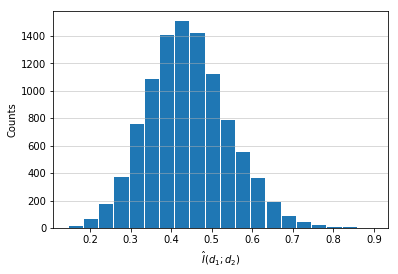

In [5]:
alist = main()
interval = (max(alist) - min(alist))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=alist, bins=20, width = 0.035)
plt.ylabel('Counts')
plt.xlabel('$\hat I(d_1;d_2)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [6]:
exp = np.mean(alist)
print('Expectation of mutual information between 5 dices is: ', str(exp))

Expectation of mutual information between 5 dices is:  0.443222534083


## Conculsion

In the first experiment, We have $I(d_1;d_2) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat I(d_1;d_2)) \approx 0.44$

## Second experiemt to estimate $\hat I(\{d_1, d_2, d_3, d_4\};d_5)$

In this experiment, we perform 50 independent rolls and compute $\hat I(\{d_1, d_2, d_3, d_4\};d_5)$ to estimate mutual information. We use [6] to indecate the range of dice number [1,2,3,4,5,6]

$\hat I(\{d_1, d_2, d_3, d_4\};d_5) = -\sum_{d_5 \in [6]} p(d_5)log(p(d_5)) + \sum_{\{d_1, d_2, d_3, d_4\} \in \{[6],[6],[6],[6]\}}\sum_{d_5 \in [6]}p(d_1, d_2, d_3, d_4, d_5)log(\frac{p(d_1, d_2, d_3, d_4, d_5)}{p(d_1, d_2, d_3, d_4)})$

We repeat this process with 10,000 simulations and plot histogram for 20 equal-frequency bins 

In [7]:
def generate_dice5():
    """
    This part is for generate 5 independent dices
    return: dic14_dic: a dictonary of (d1,d2,d3,d4) and p(d1,d2,d3,d4), 
            dice5_dic: a dictionary of d5 and p(d5)
            keys_list: a list contains ({d1,d2,d3,d4},d5) 
            value_list: a list contains p({d1,d2,d3,d4},d5) 
            dice5_list: a list contains p(d5)
    """
    # initial [(d1,d2,d3,d4),d5]
    alist = []
    # create [(d1,d2,d3,d4),d5]
    for i in range(50):
        tple1 = (rand_dice(), rand_dice(),rand_dice(), rand_dice()) #(d1,d2,d3,d4)
        tple = (tple1, rand_dice()) # (d1,d2,d3,d4),d5
        alist.append(tple)
    
    # count [(d1,d2,d3,d4),d5] into dictionary
    dic = {}
    for each in alist:
        if each not in dic.keys():
            dic[each] = 1
        else:
            dic[each] += 1
    
    # key_list contains [(d1,d2,d3,d4),d5], and value list contains corresponding counts 
    keys_list = []
    value_list = []
    for key, value in dic.items():
        keys_list.append(key)
        value_list.append(value)
    
    # change counts into probability
    sum_value = sum(value_list)    
    value_list = [each/sum_value for each in value_list]
        
    #initial dice5 list (y list)
    dice5_list = [0]*6

    keys = [1,2,3,4,5,6]
    
    # count dice 5 events
    for each in alist:
        dice5_list[each[1]-1] += 1
    
    # change count to probability and store it in dictionary
    sum_5 = len(alist)    
    dice5_list = [each/sum_5 for each in dice5_list]
    dice5_dic = dict(zip(keys, dice5_list))
    
    # initial dice 1-4 dictionary(x)
    dic14_dic = {}
    for each in alist:
        if each[0] not in dic14_dic.keys():
            dic14_dic[each[0]] = 1/sum_5
        else:
            dic14_dic[each[0]] += 1/sum_5
    
    return dic14_dic, dice5_dic, keys_list, value_list, dice5_list

In [8]:
def main1():
    """
    This part is generate 5 independent dices and calculate mutual information.
    return: alist: a list contains multiple estimate mutual information in each experiment
    """
    alist = []
    for _ in range(10000):
        result = 0
        x_dic, y_dic, key_list, comb_list, y_list = generate_dice5()
        
        #  calculate H(d1,d2,d3,d4)
        for each in y_list:
            if each != 0:
                result -= each * math.log(each,2)
        
        # calculate H(d1,d2,d3,d4) - H(d5|d1,d2,d3,d4)
        for i in range(len(key_list)):
            d1 = key_list[i][0][0] # dice 1
            d2 = key_list[i][0][1] # dice 2
            d3 = key_list[i][0][2] # dice 3
            d4 = key_list[i][0][3] # dice 4
            result += comb_list[i]*math.log(comb_list[i]/x_dic[(d1,d2,d3,d4)],2)
                        
        alist.append(result)
    return alist

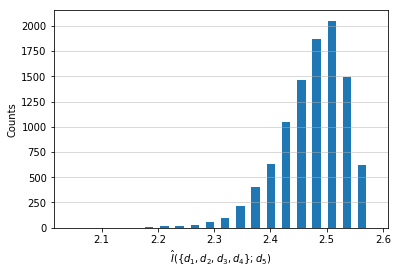

In [9]:
alist = main1()
interval = (max(alist) - min(alist))/19 
bins = [interval * i for i in range(20)]
#plt.hist(alist, bins = bins)
plt.hist(x=alist, bins=20, width = 0.015)
plt.ylabel('Counts')
plt.xlabel('$\hat I(\{d_1, d_2, d_3, d_4\};d_5)$')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [10]:
exp = np.mean(alist)
print('Expectation of mutual information between 5 dices is: ', str(exp))

Expectation of mutual information between 5 dices is:  2.48053275832


## Conculsion

In the first experiment, We have $\hat I(\{d_1, d_2, d_3, d_4\};d_5) = 0$. But estimate mutual information histogram plot has right tail and $E(\hat I(\{d_1, d_2, d_3, d_4\};d_5)) \approx 2.48$